You should consider upgrading via the 'C:\Users\denim\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


on 0: 	Graph-TestDefault: 0.0
on 1: 	Graph-TestDefault: 0.2824427480916031
on 2: 	Graph-TestDefault: 0.24427480916030533
on 3: 	Graph-TestDefault: 0.27611940298507465
on 4: 	Graph-TestDefault: 0.22627737226277372


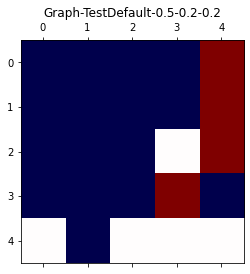

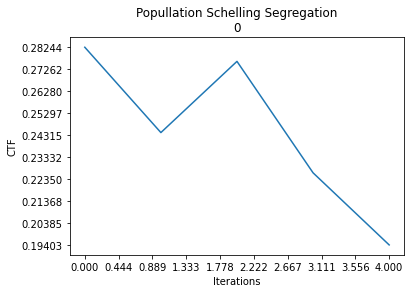

Graph-TestDefault <■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■> 5/5 [100%] in 2.5s (1.98/s)
0.19402985074626866
on 0: 	Graph-TrainingSession000: 0.0
on 10: 	Graph-TrainingSession000: 0.12662279921749955
on 20: 	Graph-TrainingSession000: 0.09527195165303946
Graph-TrainingSession000 <■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■> 30/30 [100%] in 3.8s (7.84/s)
on 0: 	Graph-TrainingSession001: 0.0
on 10: 	Graph-TrainingSession001: 0.13466334164588528
on 20: 	Graph-TrainingSession001: 0.09975062344139651


In [3]:
!pip install alive_progress

import logging
from re import X
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
import math, random, time, logging, json, glob, os, sys, shutil
from matplotlib.animation import FuncAnimation
from alive_progress import alive_bar
from PIL import Image
 
files = glob.glob('.\\Content\\*', recursive=True)

for i in files :
    print(i)

for f in files:
    try:
        shutil.rmtree(f)
    except OSError as e:
        print(e)

# Directory paths to store outputs
save_log_path = f".\\Content\\LogInfo\\"
save_img_path = f".\\Content\\GeneratedPlots"
save_giff_path = ".\\Content\\GeneratedGiffs"
        
# Check is directories are exsistant or not 
isLogDirExist = os.path.exists(save_log_path)
isImgDirExist = os.path.exists(save_img_path)
isGifExist = os.path.exists(save_giff_path)

# If directory does not exsist create it in a parellel directory of the directorty that the files is executed at 
if not isLogDirExist:
    os.makedirs(save_log_path)  
if not isImgDirExist:
    os.makedirs(save_img_path)
    os.makedirs(f"{save_img_path}\\Misc")
    os.makedirs(f"{save_img_path}\\DeliverableA")
    os.makedirs(f"{save_img_path}\\DeliverableB")
    os.makedirs(f"{save_img_path}\\DeliverableC")

if not isGifExist:
    os.makedirs(save_giff_path)

# Configure logger for outputting to logfile output 
logging.basicConfig(filename=f"{save_log_path}loginfo.log", filemode='w', level=logging.INFO)
logging = logging.getLogger('alive_progress')

# Color map for residence that are categorized by values -1 through 1
team_map = {0: "Empty Space",
           -1: "Red Residence", 
            1: "Blue Residence"}

class City(object):
    def __init__(self, t=0.5, os=0.5, mxd=0.5, g_size=30, grph_ind_num="TestDefault", num_iter = 30, cap_pt_lst=[None] ):
        # Contentedness threshold
        self.t_value = t
        # Percentage of open spaces in generated graph
        self.open_spots = os
        # Percentage of 'Red' residence versus 'Blue'  
        self.red_blue_split = mxd        
        # Graph name to indicate 'deliverable' or 'TestDefault' as default **kwarg     
        self.city_name = f"Graph-{grph_ind_num}"
        # Set the total poulation size from either defualt **kwarg or passed 'g_size' parm
        self.city_size = g_size * g_size
        # Instance of graph create on instansiation of 
        # self.city = self.generatePopulatedCity()
        self.city = np.array
        # Instansiate timmer
        self.runtime = 0.0
        # Max number of epsiodes
        self.num_of_iterations = num_iter
        # List of points to capture 
        if cap_pt_lst[0] != None:
            self.capture_points = cap_pt_lst
        else:
            self.capture_points = [int(capPt) for capPt in np.linspace(0, self.num_of_iterations, 10)]
        self.gif_img_lst = []

        self.iteration_ctf_tracked = dict([(i, 0) for i in range(0, self.num_of_iterations)])

        self.generatePopulatedCity()

    def __str__(self):
        obj_str = f"----------- {self.city_name} -----------\n"
        obj_str += f"City size:\t\t\t\t{self.red_blue_split}\n"
        obj_str += f"City Mixed Residence Percentage:\t{self.red_blue_split}\n"
        obj_str += f"City Open Spot Percentage:\t\t{self.open_spots}\n"  
        obj_str += f"City \'t-value:\':\t\t\t{self.t_value}\n"
        tot_pop = self.city_size - int(self.city_size * self.open_spots)
        obj_str += f"Total Population:\t\t{tot_pop}"
        blu_res = int(tot_pop * self.red_blue_split)
        obj_str += f"Blue Population:\t\t{int(tot_pop * self.red_blue_split)}"
        obj_str += f"Red Population:\t\t{tot_pop - blu_res }"
        obj_str += f"Open Addresses:\t\t{self.city_size - tot_pop}"
        obj_str += f"Runtime:\t\t\t\t{self.runtime}\n"
        obj_str += f"City:\n{self.city}"
        return obj_str 

    def setTValue(self, t_v):
        self.t_value=t_v

    def setOSValue(self, o_spts):
        self.open_spots=o_spts

    def setMixedValue(self, mxd):
        self.red_blue_split=mxd

    def setGraphName(self, grph_name):
        self.city_name = f"Graph-{grph_name}"

    def setCapturePoints(self, cap_pts_lst):
        self.capture_points = cap_pts_lst

    def showGraph(self, iter=0, graph_name="defualt"):
        # Matplot graph to show grid of 'city' 
        plt.matshow(self.city, cmap='seismic')
        # Set title of graph to be shown 
        plt.title(f"{self.city_name}-{graph_name}")
        # Show the graph
        plt.show()
        # time.sleep(30)
        # Close the graph
        plt.close()

    def showPlot(self, plot_dict, iter=0, plot_name="defualt", x_label="default", y_label="default"):
        # PyPlot to plot the dictionary values and keys
        plt.plot(plot_dict.keys(), plot_dict.values())
        # Create list with dictionary keys() and values() each set to plot max and min values along y-axis
        # and 10 ticks along the x-axis
        x_vals_lst = [x_tick_val for x_tick_val in np.linspace(min(plot_dict.keys()), max(plot_dict.keys()), 10)]
        y_vals_lst = [y_tick_val for y_tick_val in np.linspace(min(plot_dict.values()), max(plot_dict.values()), 10)]
        # Set label titles
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        # Set tick marks
        plt.xticks(x_vals_lst)
        plt.yticks(y_vals_lst)
        plt.title(f'Popullation Schelling Segregation\n{plot_name}')
        # Show the plot
        plt.show()
        # time.sleep(30)
        # Close the plot
        plt.close()


    def saveGraph(self, iter=0, graph_name="defualt", fname=""):
        # Matplot graph to save grid of 'city' 
        plt.matshow(self.city, cmap='seismic')
        # Set title of garph to save
        plt.title(f"{self.city_name}\nT-Value:%{self.t_value}Mixed:%{self.red_blue_split}Openspot:%{self.open_spots}-{iter:03}")
        # Directory to save new graph to
        save_grph_path = f".\\Content\\GeneratedGraphs\\{self.city_name}-{graph_name}"
        # Check is directories are exsistant or not 
        isGraphDirExist = os.path.exists(save_grph_path)
        # If directory doesn't esist make one
        if not isGraphDirExist:
            os.makedirs(save_grph_path)
        # Save the graph to parallel directory
        plt.savefig(f"{save_grph_path}\\{self.city_name}-{iter:03}-{fname}.png")
        # Save the graph image 
        self.gif_img_lst.append(f"{save_grph_path}\\{self.city_name}-{iter:03}-{fname}.png")       
        # Close the plot
        plt.close()

    def savePlot(self, plot_dict, iter=0, plot_name="defualt", x_label="default", y_label="default", fname="Misc"):
        # PyPlot to plot the dictionary values and keys
        plt.plot(plot_dict.keys(), plot_dict.values())
        # Create list with dictionary keys() and values() each set to plot max and min values along y-axis
        # and 10 ticks along the x-axis
        x_vals_lst = [x_tick_val for x_tick_val in np.linspace(min(plot_dict.keys()), max(plot_dict.keys()), 10)]
        y_vals_lst = [y_tick_val for y_tick_val in np.linspace(min(plot_dict.values()), max(plot_dict.values()), 10)]
        # Set label titles
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        # Set tick marks
        plt.xticks(x_vals_lst)
        plt.yticks(y_vals_lst)
        plt.title(f'Popullation Schelling Segregation\n{plot_name}')
        # Save the plot
        plt.savefig(f".\\Content\\GeneratedPlots\\{fname}\\Plot-{plot_name}-{self.t_value}-{self.red_blue_split}-{self.open_spots}.png")        
        # Close the plot
        plt.close()

    def toGif(self, gif_name='defualt'):
        # Instantiate the list to store frames for gif
        gif_lst = []
        # Iterate through images in gif_lst .gif
        for i in self.gif_img_lst:
            # Format frame
            new_frame = Image.open(i)
            # Add frame to list to make .gif
            gif_lst.append(new_frame)
        # Save into a GIF file that loops forever
        gif_lst[0].save(f'.\\Content\\GeneratedGiffs\\Giff-{gif_name}.gif', format='GIF',
                       append_images=gif_lst[1:],
                       save_all=True,
                       duration=300, loop=0)
        # Clear the instance of the graphs image storage 
        self.gif_img_lst.clear()

    def generatePopulatedCity(self):
        # Get total number of residence with set percentage of open spots
        number_of_residence = self.city_size - int(self.city_size * self.open_spots)
        # Get number of 'Blue residence'
        blue_residence = int(number_of_residence * self.red_blue_split)
        # Get number of 'Red residence'
        red_residence = number_of_residence - blue_residence 
        # Instasiate empty list to populate with residence
        residence_lst = []
        # Add 'Red residence' to list 
        for red_res in range(0, red_residence):
            residence_lst.append(-1) 
        # Add 'Blue residence' to list 
        for blu_res in range(0, blue_residence):
            residence_lst.append(1)
        # Add 'Open spots' to list 
        for open_res in range(0, self.city_size - number_of_residence):
            residence_lst.append(0)
        # Shuffle up the list
        random.shuffle(residence_lst)
        # Set np.array to city attribute to represent city population residence and thier location 
        self.city = np.array(residence_lst).reshape(int(math.sqrt(self.city_size)), int(math.sqrt(self.city_size)))  
        
    def isContent(self, indx_row, indx_col, verbosity=False):
        # Verbosity check
        if verbosity:
            logging.info(f"  Checking if this residence is content . . .")
        # Get the count for each type of neighbor or open space that are in the direct vicinity of the indexed residence
        blue_counter, red_counter, open_counter = self.getNeighborCount(indx_row, indx_col, verbosity=verbosity)
        # Gets the total number of actual 'residence' (not including open spots) 
        num_local_neghbors = (8 - open_counter)
        # If residence has no neighbors they are not above t-value and discontent (takes care of 'DivisionByZero' error)
        if num_local_neghbors == 0:
            return False, 0.0
        # If indexed residence is a 'Blue residence' and percentage of 'Blue neighbors' if above or equal to t-value 
        elif (self.city[indx_row][indx_col] == 1 ) and (blue_counter / num_local_neghbors  >= self.t_value):
            return True, blue_counter / num_local_neghbors 
        # If indexed residence is a 'Red residence' and percentage of 'Red neighbors' if above or equal to t-value 
        elif (self.city[indx_row][indx_col] == -1 ) and (red_counter / num_local_neghbors  >= self.t_value):
            return True, red_counter / num_local_neghbors
        # If indexed residence is a 'Blue residence' and percentage of 'Blue neighbors' is below t-value 
        elif (self.city[indx_row][indx_col] == 1 ) and (blue_counter / num_local_neghbors  < self.t_value):
            return False, blue_counter / num_local_neghbors 
        # If indexed residence is a 'Red residence' and percentage of 'Red neighbors' is below t-value             
        elif (self.city[indx_row][indx_col] == -1 ) and (red_counter / num_local_neghbors  < self.t_value):
            return False, red_counter / num_local_neghbors 
        # Evaluating open spot which will be content because its an open spot . . . 
        else:
            return True,  1.0

    def getNeighborCount(self, indx_row, indx_col, verbosity=False):
        # Temp list to build small neighboring residence 
        sub_arry_lst = []
        # Iterate through local neighbors and build list
        for col in range(indx_col-1, indx_col+2):
            for row in range(indx_row-1, indx_row+2):
                # If a invalid 'residence address' (out side of the city limits) set to "N/A"
                try:
                    sub_arry_lst.append(str(self.city[row][col]))
                except IndexError:
                    if verbosity:
                        logging.warning(f"\t\tIndex:({row}, {col}) is out of bounds.")
                    sub_arry_lst.append("N/A")
        # Replace the residence value with something other than its original value to make sure it is not counted when seraching
        # the 'sub_arry_lst' for the amount of each type of neighbor and empty spaces.
        sub_arry_lst[4] = "R"
        # Count up 'Red residence'
        blue_counter = sub_arry_lst.count("1")
        # Count up 'Blue residence'
        red_counter = sub_arry_lst.count("-1")
        # Count up 'Empty spots'
        open_counter = sub_arry_lst.count("0")
        # Verbosity check
        if verbosity:
            # This builds and logs a 3 x 3 array of local neighbors
            local_neighborhood = np.array(sub_arry_lst).reshape((3, 3))
            team = self.city[indx_row][indx_col]
            logging.info(f"\t{team_map.get(team)}:\t({indx_row}, {indx_col})")
            logging.info(f"\t{local_neighborhood[0]}")
            logging.info(f"\t{local_neighborhood[1]}")
            logging.info(f"\t{local_neighborhood[2]}")
            logging.info(f"\t\tRed Counter:\t{red_counter}")
            logging.info(f"\t\tBlue Counter:\t{blue_counter}\n- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  ")  
        return blue_counter, red_counter, open_counter

    def runSchellingSegregation(self, training_session=0, graph_name="defualt", fname="default", verbosity=False):       
        # Store copy of original randomnly populated city to reset at end of simulation 
        temp_graph = np.copy(self.city)         
        # Get starting time for method
        t1 = time.time()        
        # Initialize city CTF and previous CTF
        city_ctf = 0.0
        prev_city_ctf = 1.0
        # Clear iter CTF tracker for next run
        [self.iteration_ctf_tracked.update({i : 0}) for i in self.iteration_ctf_tracked.keys()]
        # Show status bar for Schelling Segreagation simulations 
        with alive_bar(self.num_of_iterations, bar='solid', title=f'{self.city_name}') as bar:
            for iter in range(0, self.num_of_iterations):
                # Check to see when the CTF has reached a certain level 
                # For now we set to one to allow full iteration run
                if city_ctf >= 0.5:
                # if prev_city_ctf - city_ctf < 0.0001: 
                    # Log when CTF threshold has been reached
                    logging.info(f"Convergence to Homophily! Segregation achived: {city_ctf}")
                    # Print to stdout of CTF the threshold has been reached
                    print(f"\t{self.city_name}: {city_ctf}")  
                    # Save the graph 
                    self.saveGraph(iter=iter, graph_name =f"{self.t_value}-{self.red_blue_split}-{self.open_spots}", fname=f"{self.t_value}-{self.red_blue_split}-{self.open_spots}")
                    break
                prev_city_ctf = city_ctf
                if iter in self.capture_points:                    
                    # Log CTF for every tenth of the iterations
                    logging.info(f"\tIteration {iter:>3} : CTF : {city_ctf:0.4f}")                    
                    # Print CTF to stdout for every tenth of the iterations 
                    print(f"\t{self.city_name}: {city_ctf}")                  
                    # Save the graph for every tenth of the iterations
                    self.saveGraph(iter=iter, graph_name =f"{self.t_value}-{self.red_blue_split}-{self.open_spots}", fname=f"{self.t_value}-{self.red_blue_split}-{self.open_spots}")        
                # Iterate through each residence
                for row in range(0, len(self.city[0])):
                    for col in range(0, len(self.city[row])):
                        # Verbosity check
                        if verbosity:
                            logging.info(f" Graph neighbor {team_map.get(self.city[row][col]):>3} @ ({row}, {col})")
                        # Check if residence is content along with how content for verbosity and functionality checks
                        content_or_not, contentdeness = self.isContent(row, col)
                        # If residence is content with its neighbors continue iterating through residence in city
                        if content_or_not:
                            # Verbosity check
                            if verbosity:
                                logging.info(f"\tContent! (%{contentdeness:0.2})")
                        else:                
                            # Locate all address in city that are a 'open space'
                            open_address = np.where(self.city==0)                            
                            # Create list of tuples that represent 'open addresss' 
                            posible_new_address = tuple(zip(open_address[0], open_address[1]))                           
                            # Randomnly select empty address to move currently discontent resident to
                            random_new_space = random.choice(posible_new_address)                          
                            # Verbosity check
                            if verbosity:
                                logging.warning(f"\tDiscontent! (%{contentdeness:0.2})")
                                logging.warning(f"\tPossible New Address':\t\t{posible_new_address}")
                                logging.warning(f"\tCONGRATIONLATIONS {team_map.get(self.city[row][col])}!!")
                                logging.warning(f"\tYOUR MOVING TO YOUR NEW HOME which is at ({random_new_space[0]}, {random_new_space[1]}).")
                                logging.warning(f"\tMoving into {team_map.get(self.city[random_new_space[0]][random_new_space[1]])}")                                                       
                            # Move discontent residence to newly randomnly selected empty address in the city.
                            self.city[random_new_space[0]][random_new_space[1]] = self.city[row][col]                                                
                            # Set discontent's old residence back to an 'open space' (0) 
                            self.city[row][col] = 0
                # Callculate Cities CTF 
                city_ctf =  self.calculateCTF(verbosity=verbosity)
                # Add CTF after each iteration to track CTF of iterations
                self.iteration_ctf_tracked.update({iter:city_ctf})
                # Status bar method to update it
                bar()
            # Get end time for method
            t2 = time.time()
            # Lapsed time for method
            self.runtime = t2 - t1
            # Verbosity check
            if verbosity:
                self.showGraph(iter=iter,  graph_name =f"{self.t_value}-{self.red_blue_split}-{self.open_spots}")
                self.showPlot(self.iteration_ctf_tracked, x_label='Iterations', y_label='CTF', plot_name=f"{training_session}")
                self.savePlot(self.iteration_ctf_tracked, iter=iter, x_label='Iterations', y_label='CTF', plot_name=f"Training_Session_{training_session}", fname=f'Misc')    
            # Build .gif
            self.toGif(gif_name=f"Trainging_Ses_{training_session}-{self.t_value}-{self.red_blue_split}-{self.open_spots}")       
            # Log information for limited verbosity 
            logging.info(f"\t{self.city_name}: {city_ctf}") 
            # Reset city population to originaly randomnly mixed city 
            self.city = temp_graph
           
    
        return city_ctf

    def calculateCTF(self, verbosity=False):
        # Intialize neghbor type accumulators
        total_neighbors = 0
        total_cross_neighbors = 0
        # Iterate through each residence 
        for street in range(0, len(self.city)):
            for residence in range(0, len(self.city[street])):
                # Get each residence neighbor type count
                blu_neighbors, red_neighbors, open_neighbors = self.getNeighborCount(street, residence, verbosity=verbosity)
                # Get total number of actual residence and add it to the accumulator  
                total_neighbors += (blu_neighbors + red_neighbors)
                # If the residence is a 'Blue residence' (1) then add the amount of 'Red residence' type residence to the
                # 'total_cross_neighbors' accumulator.
                if self.city[street][residence] == 1:
                    total_cross_neighbors += red_neighbors
                # If the residence is a 'Red residence' (-1) then add the amount of 'Blue residence' type residence to the
                # 'total_cross_neighbors' accumulator.                    
                elif self.city[street][residence] == -1:
                    total_cross_neighbors += blu_neighbors     
        # Verbosity check
        if verbosity:
            logging.info(f" Calculating CTF . . . ") 
        # After iterating through all residence calculate the ctf
        ctf = total_cross_neighbors / total_neighbors
        # Verbosity check
        if verbosity:
            logging.info(f"\tTotal Cross Residence Neghbors:\t{total_cross_neighbors}")
            logging.info(f"\tTotal Immediate Neghbors:\t{total_neighbors}")
            logging.info(f"\tCTF:\t{ctf}")
        # Return the Cities CTF 
        return ctf

    def average_CTF(self, red_blue_split, t, pct_empty, training_sessions=10, verbosity=False, avg_ctf_plot_name='AvgCtf', deliv_loc="Misc"):      
        avg_ctf_tracker =  dict([(i, 0) for i in range(0, training_sessions)])
        self.setTValue(t)
        self.setMixedValue(red_blue_split)
        self.setOSValue(pct_empty)
        # Test Schelling Segregation 
        for ses in range(0, training_sessions):
            logging.info(f"Training Session-{ses:03}-TVAL{self.t_value}-OPEN{self.open_spots}-MIXD{self.red_blue_split:03}")
            self.setGraphName(f"TrainingSession{ses:03}")
            train_sesion_ctf_reuslt = self.runSchellingSegregation(training_session=ses, verbosity=verbosity)
            avg_ctf_tracker.update({ses : avg_ctf_tracker.get(ses) + train_sesion_ctf_reuslt})            
            logging.info(f"\tAverage Run Reults {ses}:{avg_ctf_tracker}") 

        self.savePlot(avg_ctf_tracker, iter=ses, plot_name=f'{avg_ctf_plot_name}-{ses:03}', x_label="Varying Variable Training Sessions", y_label="CTF Value", fname=deliv_loc)
        # Verbosity check
        # if verbosity:
        #     self.showPlot(avg_ctf_tracker, iter=0, graph_name=f'{avg_ctf_plot_name}-{ses:03}', x_label="Iterations", y_label="CTF Value")       
        [avg_ctf_tracker.update({i : j / training_sessions}) for i, j in avg_ctf_tracker.items()]
        return list(avg_ctf_tracker.values())[-1]

# debugCity = City(g_size = 10, t=0.5, os=0.2, mxd=0.2)
# mxdPopVa= debugCity.average_CTF(debugCity.red_blue_split, debugCity.t_value, debugCity.open_spots, avg_ctf_plot_name="Debug", training_sessions=3, verbosity=True)






'''
++++++++++++++++++++++++++++++++++++++ DELIVERABLE 01 ++++++++++++++++++++++++++++++++++++++
Implement Schelling’s model of segregation (on square grids) using code of your own design.
I will check for copy-pasted code from the internet. You may use any system you like as long
as the above idea is implemented faithfully.

The code for your project (you may write your own visualizer or use the
Python one that I have provided). In the PDF, provide several examples (for example, using
small 3x3 or 4x4 grids) to verify that your “contentedness” and “move-to-empty” functions
are operating as intended. Also note: step 2 in the algorithm above is ambiguous (i.e., I
didn’t tell you whether to iterate over the grid, over the agents, or in what order; I also didn’t
tell you whether to check satisfaction for all agents before moving any, or if you should check-
move check-move one-by-one). Your PDF should explain precisely and explicitly how you
decided to resolve this ambiguity! I.e., give a precise description of your satisfaction-checking
and agent-moving mechanic.
'''
logging.info(f"- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ")
logging.info(f"- - - - - - - - - - - - - -  - - Test Proof Of Concept - - - - - - - - - - - - - - - - -") 
logging.info(f"- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ") 
# Test Schelling Segregation 
tstGraph = City(g_size=5, t=0.5, os=0.2, mxd=0.2, num_iter=5)

vall = tstGraph.runSchellingSegregation(verbosity=True)

print(vall)


'''
++++++++++++++++++++++++++++++++++++++ DELIVERABLE 02 ++++++++++++++++++++++++++++++++++++++
How segregated is the map throughout a simulation run? Create a function which checks the
cross-type-fraction (CTF) of a snapshot of the map. As demonstrated in class, this function
will divide the number of different-type neighbors (summed over all agents) by the total
number of neighbors (summed over all agents). You should be able to call your function at
each step along a simulation to see how the CTF changes as agents move around.

Create a series of plots which demonstrate how the CTF changes over the
course of several simulation runs of the model. Each plot should have iteration number on the
horizontal axis. You should choose at least 3 sets of parameter values (i.e., at least 3 different
combinations red/blue split, satisfaction threshold t, and % empty). For each of these 3 sets
of parameter values, do 5-10 simulation runs and plot their CTF traces together. You should
have one plot with 5-10 traces for each of the 3 sets of parameter values, for a total of 3 plots.
Clearly mark what parameter values gave rise to each of the plots.

'''

logging.info(f"- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ")
logging.info(f"- - - - - - - - - - - - - - - - - Devliverable 02 - - - - - - - - - - - - - - - - - - - -") 
logging.info(f"- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ") 
deliverableCity = City(t=0.5, os=0.2, mxd=0.2)

# List of three choosen values to evaluate
tval_var_lst = [0.3, 0.4, 0.5, 0.6, 0.7]
mxd_var_lst =  [0.3, 0.4, 0.5, 0.6, 0.7]
os_var_lst =   [0.3, 0.4, 0.5, 0.6, 0.7]

# Iterate through different 'Mixed Pop' variaitons
mxd_pop_avg_lst = []
# Setting capture points example. Lowered to avoid 'Tk_GetPixmap' error (not to save to many images)
deliverableCity.setCapturePoints([int(capPt) for capPt in np.linspace(0, deliverableCity.num_of_iterations, 4)])
for variation in mxd_var_lst:
    deliverableCity.generatePopulatedCity()
    mxdPopVarAvg = deliverableCity.average_CTF(variation, deliverableCity.t_value, deliverableCity.open_spots, training_sessions=10, avg_ctf_plot_name="Deliverable02.a", deliv_loc = 'DeliverableA')
    mxd_pop_avg_lst.append(mxdPopVarAvg)

# Iterate through different 'T-Values' variaitons
t_val_avg_lst = []
for variation in tval_var_lst:
    deliverableCity.generatePopulatedCity()
    tValVarAvg = deliverableCity.average_CTF(deliverableCity.red_blue_split, variation, deliverableCity.open_spots, avg_ctf_plot_name="Deliverable02.b", deliv_loc = 'DeliverableB')
    t_val_avg_lst.append(tValVarAvg)

#Iterate through different 'Open Spot' variations
opn_spt_avg_lst = []
for variation in os_var_lst:
    deliverableCity.generatePopulatedCity()
    opnSpcVarAvg = deliverableCity.average_CTF(deliverableCity.red_blue_split, deliverableCity.t_value, variation, avg_ctf_plot_name="Deliverable02.c", deliv_loc = 'DeliverableC')
    opn_spt_avg_lst.append(opnSpcVarAvg)    



'''
 ++++++++++++++++++++++++++++++++++++++ DELIVERABLE 03 ++++++++++++++++++++++++++++++++++++++
How does segregation depend on parameter values? Create a function which measures the
average CTF at the end of a simulation run as a function of input parameters. Your function’s
call signature should be

                average CTF(red blue split, t, pct empty)

When called, this function should perform 10 simulation runs with those parameters, record
the CTF found at the end of each run, and then return the average of those 10 CTF values.

Three plots created using your average CTF function:

    (a) Plot 1 should display average CTF as a function of red blue split with the other
        parameters held constant,
    (b) Plot 2 should display average CTF as a function of t with the other parameters held
        constant, and
    (c) Plot 3 should display average CTF as a function of pct empty with the other parameters
        held constant.

Each plot should have at least 10 points on the horizontal axis so that you can see the general
shape of the curve. Note that each time you call average CTF, it performs 10 simulation
runs, so if you have 10 points on the horizontal axis of each of these plots, this deliverable
requires a total of 300 simulation runs. Plan your time accordingly, and if your code is very
slow, you might want to consider saving the results of each simulation to disk after each run
just in case your code hits a bug before it performs all 300 runs.
'''

logging.info(f"- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ")
logging.info(f"- - - - - - - - - - - - - - - - - Devliverable 03 - - - - - - - - - - - - - - - - - - - -") 
logging.info(f"- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ")

deliverableCity.showPlot(dict(zip(mxd_var_lst, mxd_pop_avg_lst)),iter=0, plot_name=f'{"Deliverable02.a"}', x_label="Variation Vaues for different \'Mixed Red Blue Residence\'", y_label="CTF Value")
deliverableCity.savePlot(dict(zip(mxd_var_lst, mxd_pop_avg_lst)),iter=0, plot_name=f'{"Deliverable02.a"}', x_label="Variation Vaues for different \'Mixed Red Blue Residence\'", y_label="CTF Value", fname="DeliverableA")

deliverableCity.showPlot(dict(zip(tval_var_lst, t_val_avg_lst)),iter=0, plot_name=f'{"Deliverable02.b"}', x_label="Variation Vaues for different t-values for \'Residence Conteness Threshold\'", y_label="CTF Value")
deliverableCity.savePlot(dict(zip(tval_var_lst, t_val_avg_lst)),iter=0, plot_name=f'{"Deliverable02.b"}', x_label="Variation Vaues for different t-values for \'Residence Conteness Threshold\'", y_label="CTF Value", fname="DeliverableB")

deliverableCity.showPlot(dict(zip(tval_var_lst, opn_spt_avg_lst)),iter=0, plot_name=f'{"Deliverable02.c"}', x_label="Variation Vaues for different \'Open Addresses\'", y_label="CTF Value")
deliverableCity.savePlot(dict(zip(tval_var_lst, opn_spt_avg_lst)),iter=0, plot_name=f'{"Deliverable02.c"}', x_label="Variation Vaues for different \'Open Addresses\'", y_label="CTF Value", fname="DeliverableC")